# Analisis ANOVA

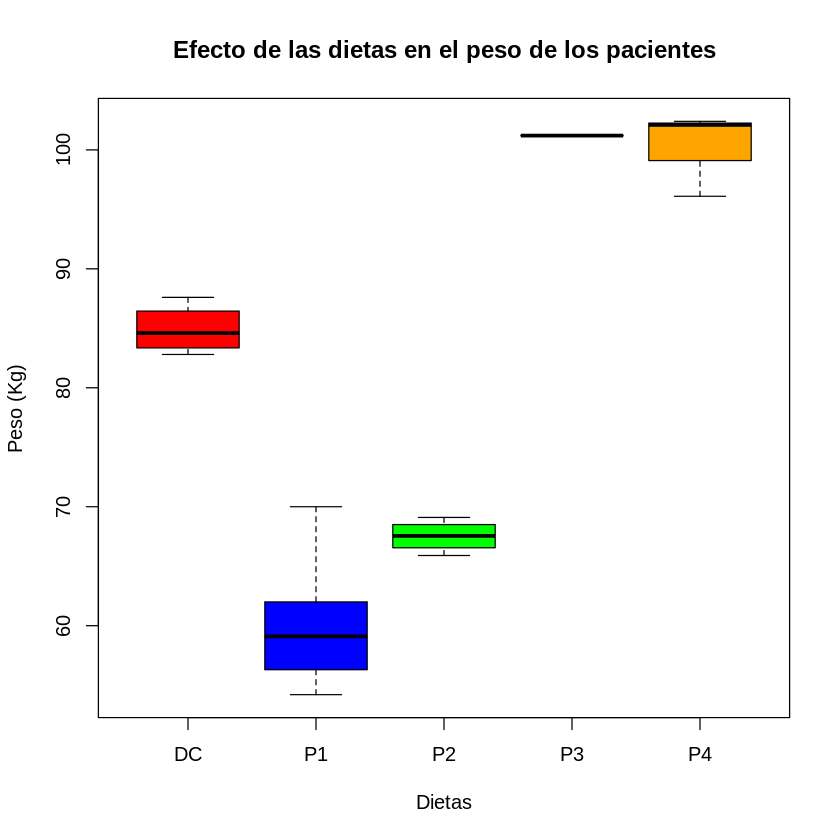

In [1]:
# Crear vectores para Dietas y Pesos
Dietas <- c("P1", "P1", "P1", "P1", "P1", "P2", "P2", "P2", "P2", "P3", "P4", "P4", "P4", "DC", "DC", "DC", "DC")
Pesos <- c(70, 56.3, 62, 54.2, 59.1, 67.9, 67.2, 65.9, 69.1, 101.2, 102.1, 102.4, 96.1, 87.6, 83.9, 82.8, 85.3)

boxplot(Pesos ~ Dietas, col = c("red", "blue", "green", "yellow", "orange"), ylab="Peso (Kg)", xlab="Dietas", main="Efecto de las dietas en el peso de los pacientes")


In [2]:
tapply(Pesos, Dietas, mean)


DC      P1      P2      P3      P4 
 84.900  60.320  67.525 101.200 100.200

In [25]:
fm = aov(lm(Pesos ~ Dietas))
summary(fm)

            Df Sum Sq Mean Sq F value   Pr(>F)    
Dietas       4   4199  1049.8   64.56 5.16e-08 ***
Residuals   12    195    16.3                     
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

In [16]:
significancia <- 0.05
I <- 5
n <- length(Pesos)
qf(significancia, I - 1, n - 1, lower.tail = F)

[1] 3.006917

In [48]:
F_value <- summary(fm)[[1]][["Pr(>F)"]]


as.numeric(F_value)
if (5.16e-08 < significancia) {
  cat("Se rechaza la hipótesis nula. Hay diferencias significativas entre las dietas.\n")
} else {
  cat("No se rechaza la hipótesis nula. No hay diferencias significativas entre las dietas.\n")
}
F_value

[1] 5.159822e-08           NA

Se rechaza la hipótesis nula. Hay diferencias significativas entre las dietas.


[1] 5.159822e-08           NA

Tenemos que 64.5652294636345(F_value) >  3.00691727992434,  por lo tanto rechazamos la hipotesis nula y concluimos que al menos una de las medias es diferente.

# Validacion del modelo ANOVA
## Independencia

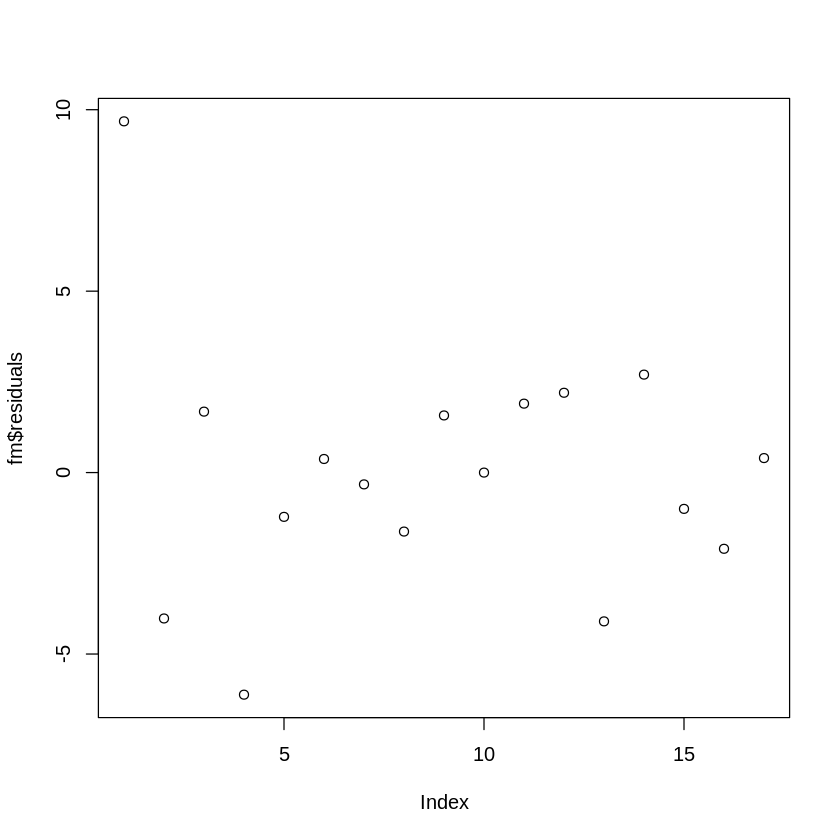

In [28]:
plot(fm$residuals)

## Normalidad

In [29]:
summary(fm$residuals)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 -6.120  -1.625   0.000   0.000   1.680   9.680 

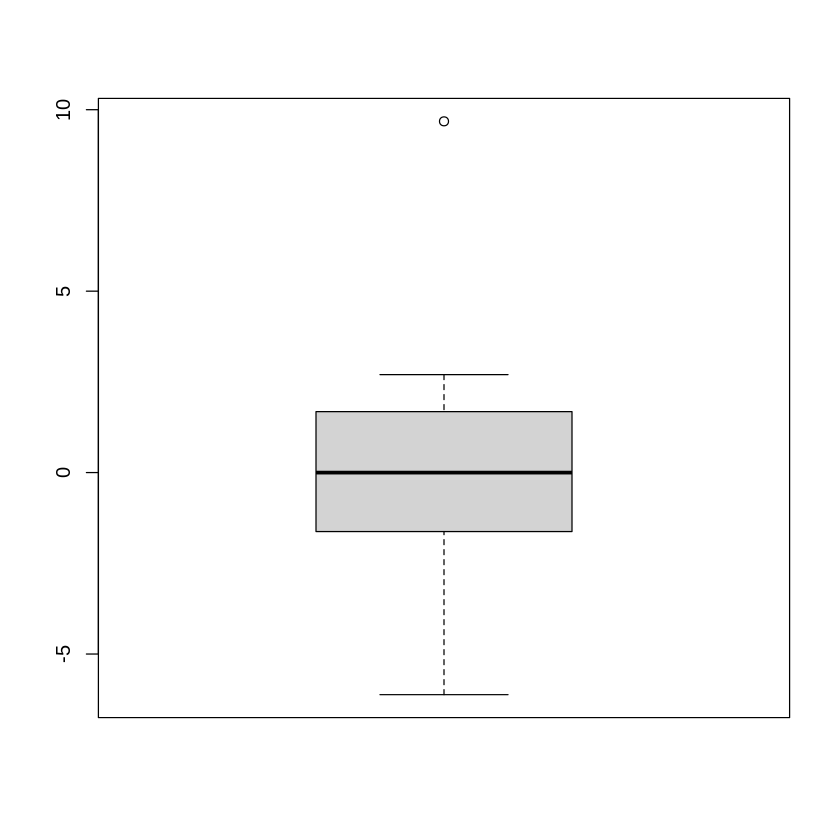

In [30]:
boxplot(fm$residuals)

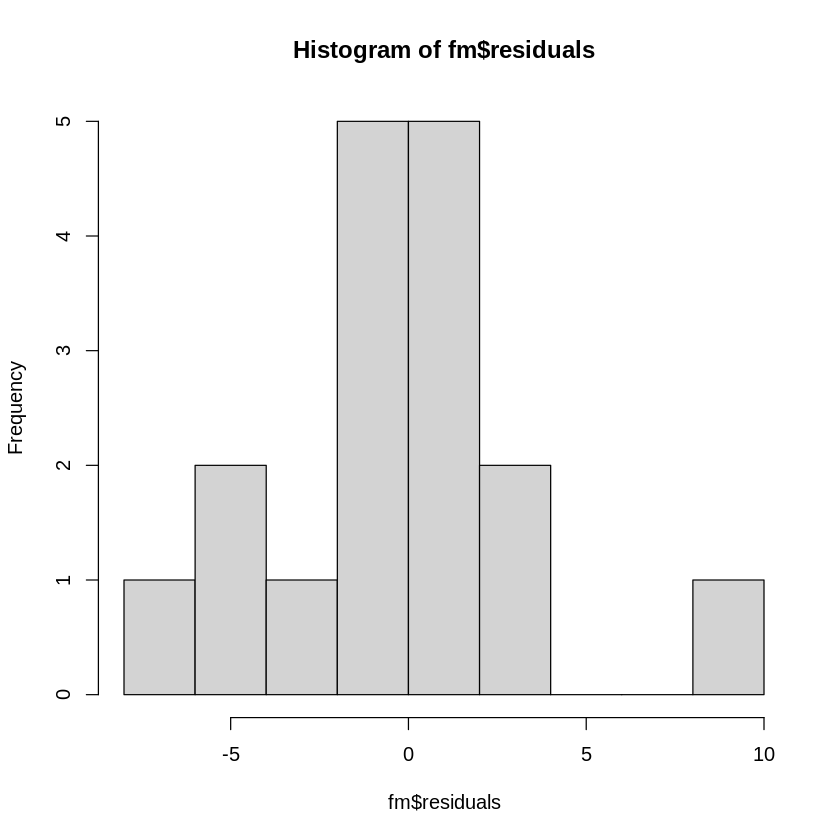

In [31]:
hist(fm$residuals)


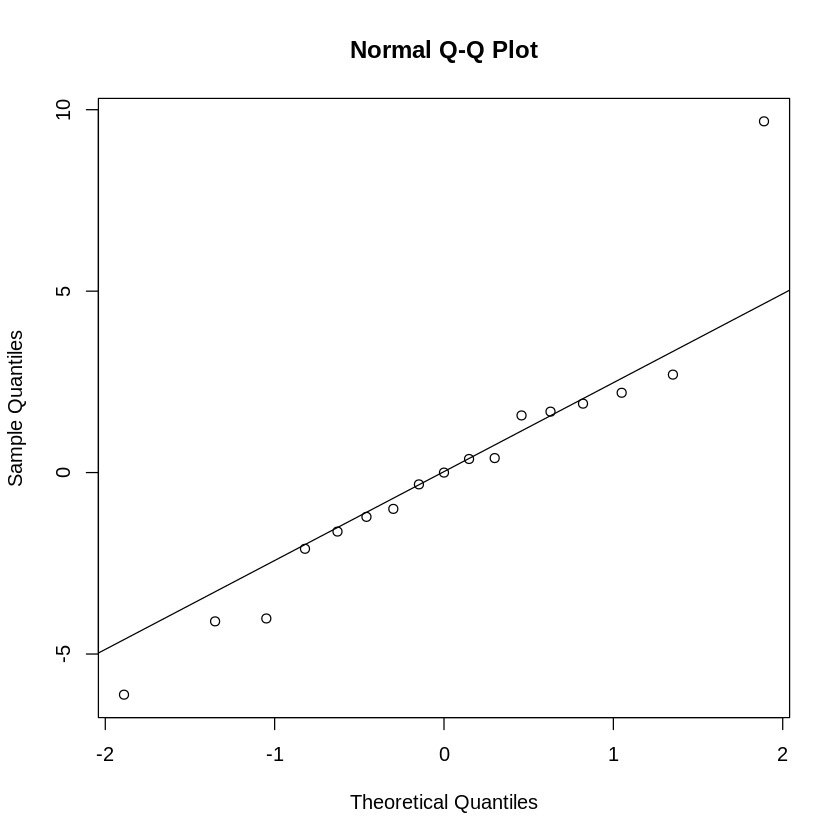

In [32]:
qqnorm(fm$residuals)
qqline(fm$residuals)


In [33]:
shapiro.test(fm$residuals)


	Shapiro-Wilk normality test

data:  fm$residuals
W = 0.91881, p-value = 0.141


tenemos que los datos son normales debido al p-value > 0.05

## Homocedasticidad

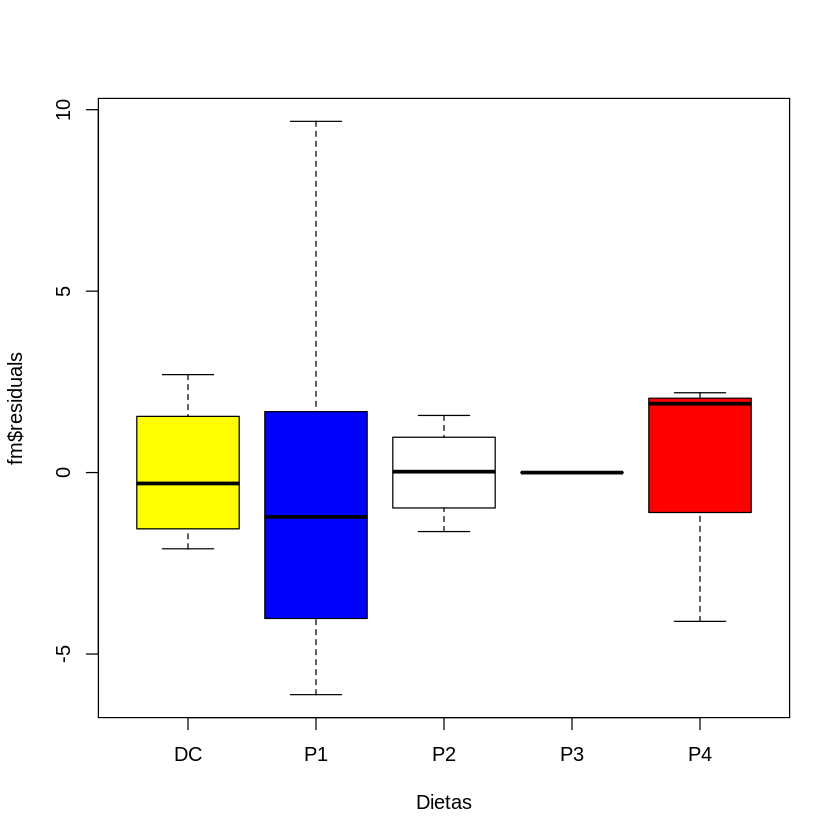

In [35]:
boxplot(fm$residuals~Dietas, col = c("yellow", "blue", "white","green", "red"))

In [36]:
desviaciones <- tapply(fm$residuals, Dietas, sd)

In [38]:
desviaciones

DC       P1       P2       P3       P4 
2.070427 6.156866 1.337597       NA 3.553871

In [39]:
6.1568660859239/1.33759734848222

[1] 4.602929

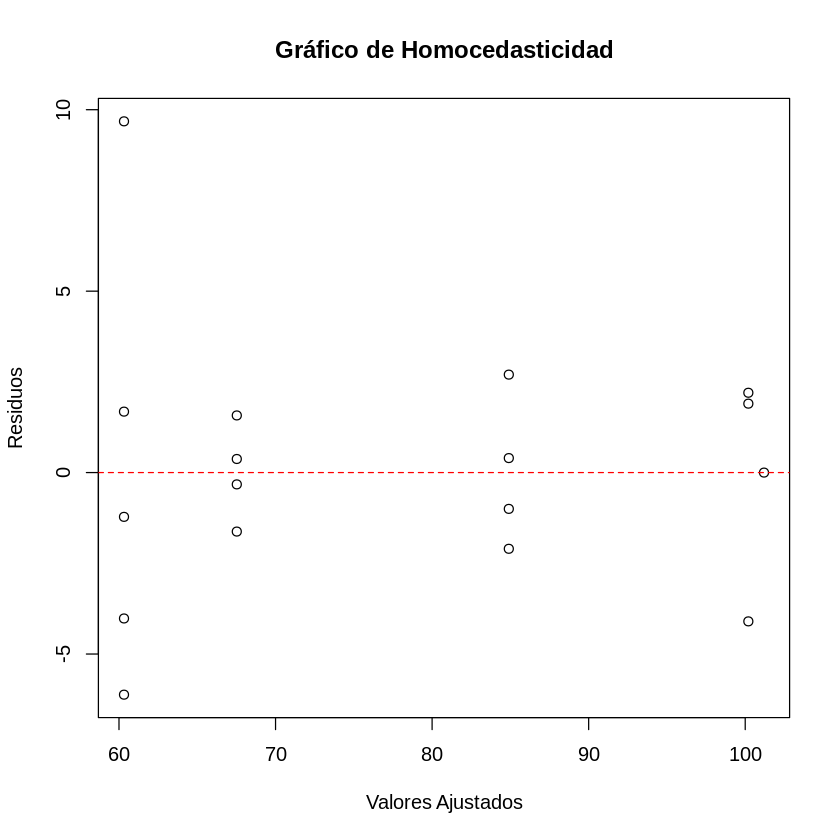

In [41]:
residuos <- resid(fm)
valores_ajustados <- fitted(fm)
plot(valores_ajustados, residuos, main = "Gráfico de Homocedasticidad",
     xlab = "Valores Ajustados", ylab = "Residuos")
abline(h = 0, col = "red", lty = 2)

## Residuos

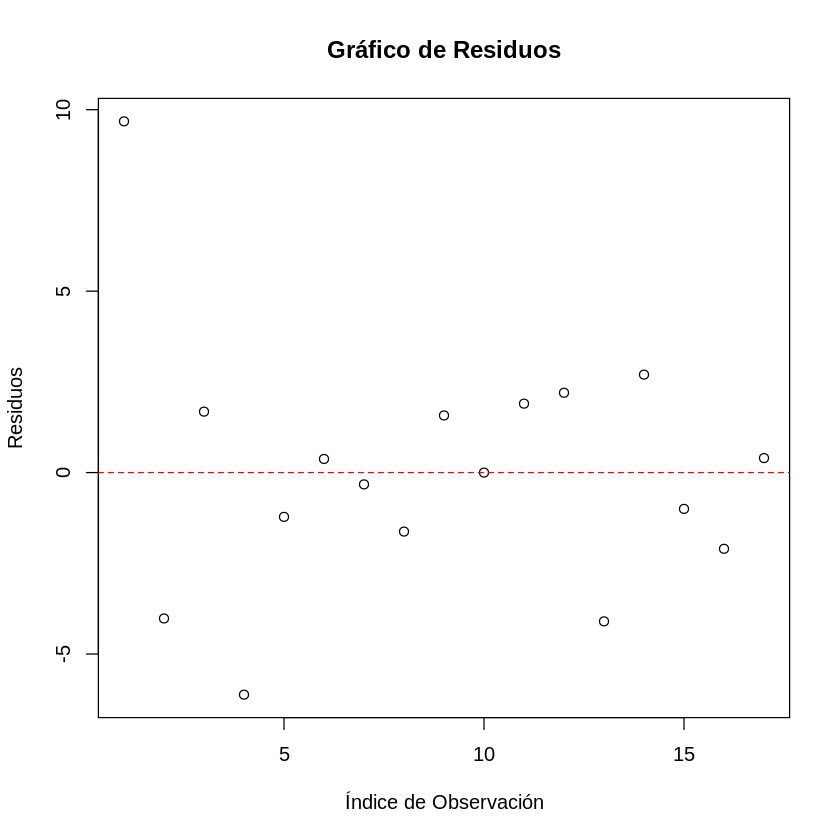

In [42]:
plot(residuos, main = "Gráfico de Residuos", xlab = "Índice de Observación", ylab = "Residuos")
abline(h = 0, col = "red", lty = 2)